In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# Load the data
data = pd.read_csv("./Resources/loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
print(data.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [5]:
#  Adding the 'total_assets' column
data['total_assets'] = data[' residential_assets_value'] + data[' commercial_assets_value'] + data[' luxury_assets_value'] + data[' bank_asset_value']

#Normalization

# Apply Min-Max scaling to CIBIL Scores
minmax_scaler = MinMaxScaler()
data[' cibil_score'] = minmax_scaler.fit_transform(data[[' cibil_score']])

# Assuming ' income_annum', ' loan_amount', and 'total_assets' are continuous numerical columns
numerical_features = [' income_annum', ' loan_amount', 'total_assets']

standard_scaler = StandardScaler()
data[numerical_features] = standard_scaler.fit_transform(data[numerical_features])

In [6]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets
0,1,2,Graduate,No,1.617979,1.633052,12,0.796667,2400000,17600000,22700000,8000000,Approved,0.930628
1,2,0,Not Graduate,Yes,-0.341750,-0.324414,8,0.195000,2700000,2200000,8800000,3300000,Rejected,-0.797198
2,3,3,Graduate,No,1.439822,1.610933,20,0.343333,7100000,4500000,33300000,12800000,Rejected,1.289524
3,4,3,Graduate,No,1.119139,1.721525,8,0.278333,18200000,3300000,23300000,7900000,Rejected,1.033170
4,5,5,Not Graduate,Yes,1.689242,1.002681,20,0.136667,12400000,8200000,29400000,5000000,Rejected,1.151093


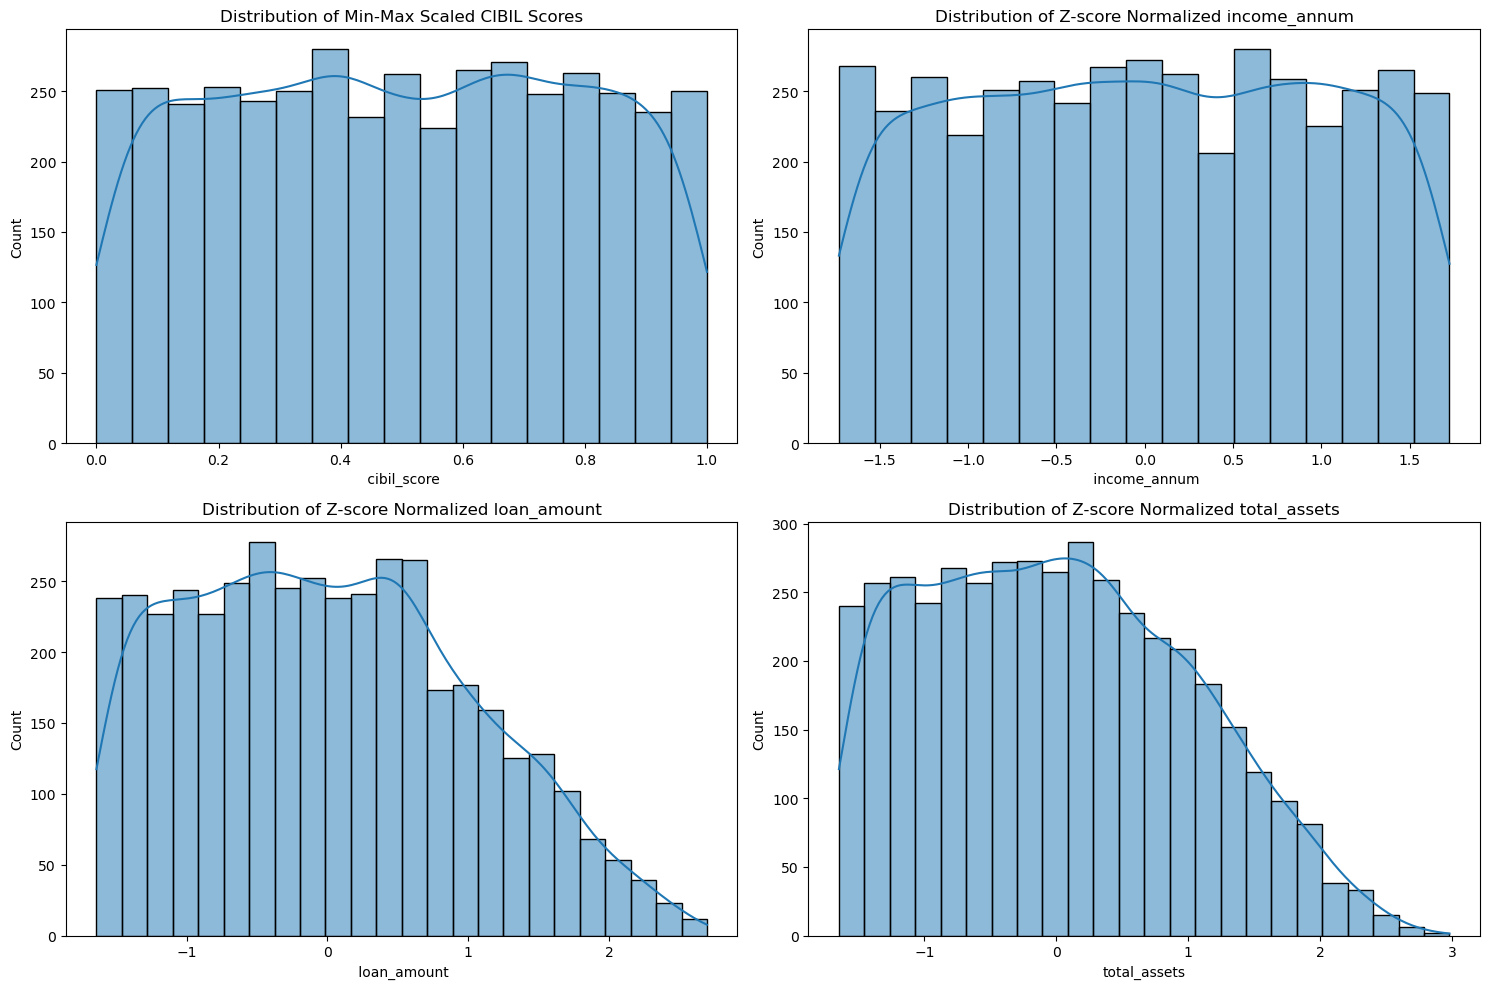

In [7]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot for cibil_score after Min-Max Scaling
sns.histplot(data[' cibil_score'], ax=ax[0, 0], kde=True)
ax[0, 0].set_title('Distribution of Min-Max Scaled CIBIL Scores')

# Plot for income_annum after Z-score Normalization
sns.histplot(data[' income_annum'], ax=ax[0, 1], kde=True)
ax[0, 1].set_title('Distribution of Z-score Normalized income_annum')

# Plot for loan_amount after Z-score Normalization
sns.histplot(data[' loan_amount'], ax=ax[1, 0], kde=True)
ax[1, 0].set_title('Distribution of Z-score Normalized loan_amount')

# Plot for total_assets after Z-score Normalization
sns.histplot(data['total_assets'], ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Distribution of Z-score Normalized total_assets')

plt.tight_layout()
plt.show()

In [8]:
# columns as features and target
X = data[[' income_annum', ' loan_amount', ' cibil_score']]
y = data[' loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the ML Model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Testing
y_pred = clf.predict(X_test)

# Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", confusion)


Model Accuracy: 0.9250585480093677

Classification Report:
               precision    recall  f1-score   support

    Approved       0.95      0.93      0.94       536
    Rejected       0.88      0.92      0.90       318

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854


Confusion Matrix:
 [[498  38]
 [ 26 292]]


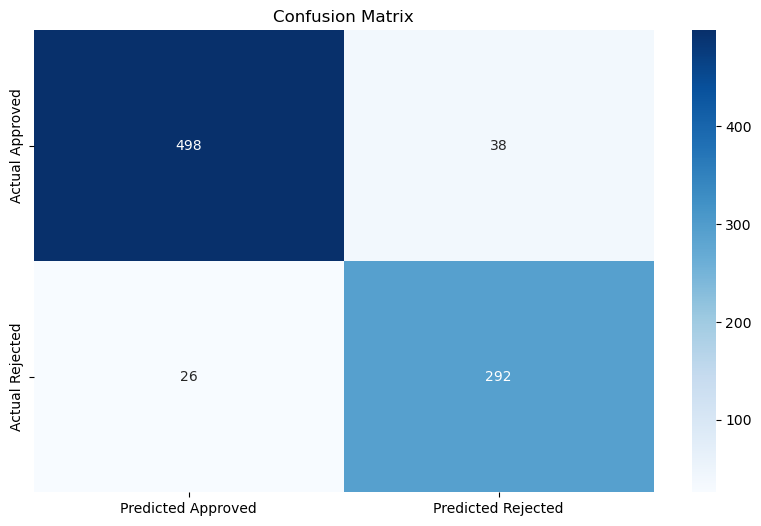

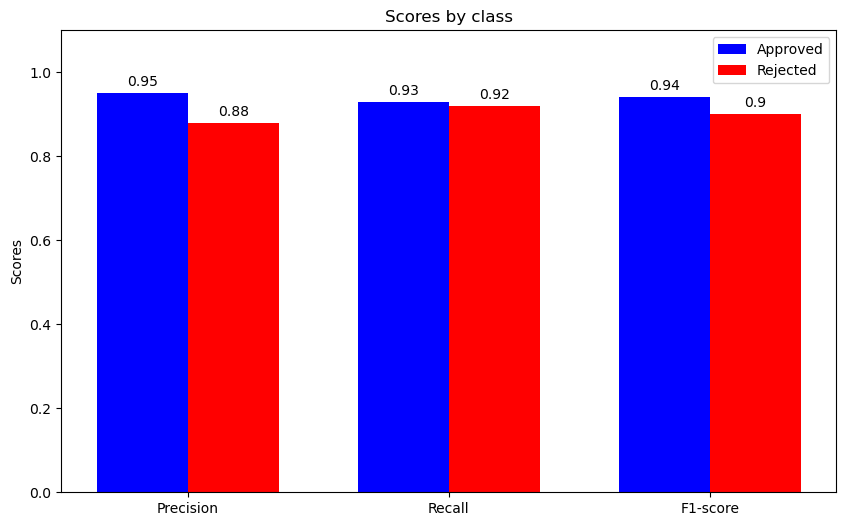

In [9]:
# 1. Heatmap for the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted Approved', 'Predicted Rejected'], 
            yticklabels=['Actual Approved', 'Actual Rejected'])
plt.title('Confusion Matrix')
plt.show()

# 2. Bar chart for precision, recall, and f1-score
labels = ['Precision', 'Recall', 'F1-score']
approved_metrics = [0.95, 0.93, 0.94]
rejected_metrics = [0.88, 0.92, 0.90]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, approved_metrics, width, label='Approved', color='b')
rects2 = ax.bar(x + width/2, rejected_metrics, width, label='Rejected', color='r')

# Add some text for labels, title and custom x-axis tick labels,
ax.set_ylabel('Scores')
ax.set_title('Scores by class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.ylim(0, 1.1)
plt.show()